In [1]:
# подключение основных библиотек
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
#подгружаем и просматриваем наш датасет на 1660 файлов
df = pd.read_csv('1660_films.csv')
df

,ID_kinopoisk,week,month,screens,budget,age_R,time,genre_box_buget,genre_avr_kinopoisk_R,genre_avr_box,...,skr2_box_buget,skr2_avr_kinopoisk_R,skr2_avr_box,skr2_avr_views,box_budget,kinopoisk_R,box,views,rezult,rezult4
0,70952.0,7,2,100,46096480.0,12.0,115.0,0.51,6.18,66377566,...,1.17,7.40,54000000.0,551000.0,1.17,7.4,54000000,551000,0,1
1,77396.0,14,4,117,57620600.0,0.0,98.0,0.94,5.23,181394667,...,0.78,4.80,45000000.0,464000.0,0.78,4.8,45000000,464000,0,0
2,79850.0,28,7,315,121003260.0,16.0,115.0,0.94,5.23,181394667,...,1.66,6.33,209666667.0,2029000.0,3.84,6.1,465000000,4400000,1,3
3,253754.0,40,9,47,46096480.0,12.0,101.0,0.51,6.18,66377566,...,0.25,5.90,24275000.0,124000.0,0.16,6.4,7300000,61000,0,0
4,252013.0,44,10,188,57620600.0,6.0,90.0,1.19,6.07,148983326,...,0.33,6.70,19000000.0,295000.0,0.33,6.7,19000000,295000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,4493006.0,15,4,1656,39100000.0,12.0,91.0,1.88,5.36,129218872,...,0.25,5.90,24275000.0,124000.0,0.52,6.3,20396022,75750,0,0
1657,4400163.0,15,4,235,51790451.0,18.0,75.0,0.51,6.18,66377566,...,0.02,0.00,881000.0,2634.0,0.02,6.0,881000,2634,0,0
1658,5059142.0,16,4,23,79817750.0,16.0,101.0,0.51,6.18,66377566,...,1.04,7.10,16541000.0,84123.0,0.29,6.0,82000,245,0,0
1659,5002368.0,16,4,66,79817750.0,18.0,120.0,0.51,6.18,66377566,...,0.00,0.00,496626.0,1411.0,0.29,6.0,496626,1411,0,0


In [3]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["rezult"] # отбираем столбец с откликами

In [4]:
from sklearn.model_selection import train_test_split
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [5]:
#запускаем ансамблевые модели МL
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [6]:
# Создаем модели
models = {
    'AdaBoost': AdaBoostClassifier(random_state = 42),
    'Bagging': BaggingClassifier(random_state = 42),
    'ExtraTrees': ExtraTreesClassifier(random_state = 42),
    'GradientBoosting': GradientBoostingClassifier(random_state = 42),
    'RandomForest': RandomForestClassifier(random_state = 42),
    'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression(random_state = 42)), ('rf', RandomForestClassifier(random_state = 42))]),
    'Voting': VotingClassifier(estimators=[('lr', LogisticRegression(random_state = 42)), ('rf', RandomForestClassifier(random_state = 42))]),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state = 42),
    'CatBoost': CatBoostClassifier(random_state = 42)
}

In [7]:
# Обучаем модели на базовых настройках и делаем предсказания
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

Learning rate set to 0.010984
0:	learn: 0.6698792	total: 145ms	remaining: 2m 25s
1:	learn: 0.6477757	total: 150ms	remaining: 1m 14s
2:	learn: 0.6275848	total: 155ms	remaining: 51.6s
3:	learn: 0.6104735	total: 160ms	remaining: 39.9s
4:	learn: 0.5900168	total: 164ms	remaining: 32.7s
5:	learn: 0.5698971	total: 169ms	remaining: 28s
6:	learn: 0.5510681	total: 173ms	remaining: 24.6s
7:	learn: 0.5331935	total: 178ms	remaining: 22s
8:	learn: 0.5138885	total: 186ms	remaining: 20.4s
9:	learn: 0.4989827	total: 190ms	remaining: 18.8s
10:	learn: 0.4834700	total: 194ms	remaining: 17.5s
11:	learn: 0.4700457	total: 199ms	remaining: 16.4s
12:	learn: 0.4559792	total: 203ms	remaining: 15.4s
13:	learn: 0.4402895	total: 208ms	remaining: 14.6s
14:	learn: 0.4281030	total: 212ms	remaining: 13.9s
15:	learn: 0.4157724	total: 216ms	remaining: 13.3s
16:	learn: 0.4037509	total: 221ms	remaining: 12.8s
17:	learn: 0.3923489	total: 225ms	remaining: 12.3s
18:	learn: 0.3832132	total: 230ms	remaining: 11.9s
19:	learn: 0.

163:	learn: 0.0753198	total: 884ms	remaining: 4.5s
164:	learn: 0.0749685	total: 888ms	remaining: 4.49s
165:	learn: 0.0747887	total: 894ms	remaining: 4.49s
166:	learn: 0.0745260	total: 898ms	remaining: 4.48s
167:	learn: 0.0742275	total: 903ms	remaining: 4.47s
168:	learn: 0.0738455	total: 909ms	remaining: 4.47s
169:	learn: 0.0735052	total: 913ms	remaining: 4.46s
170:	learn: 0.0733917	total: 917ms	remaining: 4.45s
171:	learn: 0.0731739	total: 922ms	remaining: 4.44s
172:	learn: 0.0729843	total: 927ms	remaining: 4.43s
173:	learn: 0.0726482	total: 931ms	remaining: 4.42s
174:	learn: 0.0722896	total: 935ms	remaining: 4.41s
175:	learn: 0.0719940	total: 940ms	remaining: 4.4s
176:	learn: 0.0716687	total: 944ms	remaining: 4.39s
177:	learn: 0.0714258	total: 949ms	remaining: 4.38s
178:	learn: 0.0712406	total: 953ms	remaining: 4.37s
179:	learn: 0.0709642	total: 957ms	remaining: 4.36s
180:	learn: 0.0706713	total: 962ms	remaining: 4.35s
181:	learn: 0.0704268	total: 966ms	remaining: 4.34s
182:	learn: 0.

358:	learn: 0.0429202	total: 1.75s	remaining: 3.13s
359:	learn: 0.0427240	total: 1.76s	remaining: 3.13s
360:	learn: 0.0426259	total: 1.76s	remaining: 3.12s
361:	learn: 0.0425554	total: 1.77s	remaining: 3.12s
362:	learn: 0.0424644	total: 1.77s	remaining: 3.11s
363:	learn: 0.0424306	total: 1.78s	remaining: 3.11s
364:	learn: 0.0423484	total: 1.78s	remaining: 3.1s
365:	learn: 0.0422826	total: 1.79s	remaining: 3.09s
366:	learn: 0.0422072	total: 1.79s	remaining: 3.09s
367:	learn: 0.0421507	total: 1.79s	remaining: 3.08s
368:	learn: 0.0420990	total: 1.8s	remaining: 3.08s
369:	learn: 0.0420026	total: 1.8s	remaining: 3.07s
370:	learn: 0.0419458	total: 1.81s	remaining: 3.07s
371:	learn: 0.0418514	total: 1.81s	remaining: 3.06s
372:	learn: 0.0417768	total: 1.82s	remaining: 3.05s
373:	learn: 0.0417058	total: 1.82s	remaining: 3.05s
374:	learn: 0.0416156	total: 1.83s	remaining: 3.04s
375:	learn: 0.0414956	total: 1.83s	remaining: 3.04s
376:	learn: 0.0413512	total: 1.83s	remaining: 3.03s
377:	learn: 0.0

517:	learn: 0.0311281	total: 2.45s	remaining: 2.28s
518:	learn: 0.0310794	total: 2.46s	remaining: 2.28s
519:	learn: 0.0310512	total: 2.46s	remaining: 2.27s
520:	learn: 0.0309765	total: 2.47s	remaining: 2.27s
521:	learn: 0.0309012	total: 2.47s	remaining: 2.27s
522:	learn: 0.0308321	total: 2.48s	remaining: 2.26s
523:	learn: 0.0307837	total: 2.48s	remaining: 2.25s
524:	learn: 0.0307071	total: 2.49s	remaining: 2.25s
525:	learn: 0.0306265	total: 2.49s	remaining: 2.24s
526:	learn: 0.0305323	total: 2.5s	remaining: 2.24s
527:	learn: 0.0304757	total: 2.5s	remaining: 2.23s
528:	learn: 0.0304273	total: 2.5s	remaining: 2.23s
529:	learn: 0.0303399	total: 2.51s	remaining: 2.22s
530:	learn: 0.0302801	total: 2.51s	remaining: 2.22s
531:	learn: 0.0302269	total: 2.52s	remaining: 2.21s
532:	learn: 0.0301348	total: 2.52s	remaining: 2.21s
533:	learn: 0.0300913	total: 2.52s	remaining: 2.2s
534:	learn: 0.0300504	total: 2.53s	remaining: 2.2s
535:	learn: 0.0300204	total: 2.53s	remaining: 2.19s
536:	learn: 0.029

680:	learn: 0.0231922	total: 3.15s	remaining: 1.47s
681:	learn: 0.0231436	total: 3.15s	remaining: 1.47s
682:	learn: 0.0230573	total: 3.16s	remaining: 1.47s
683:	learn: 0.0229997	total: 3.16s	remaining: 1.46s
684:	learn: 0.0229474	total: 3.16s	remaining: 1.46s
685:	learn: 0.0229346	total: 3.17s	remaining: 1.45s
686:	learn: 0.0228672	total: 3.17s	remaining: 1.45s
687:	learn: 0.0228330	total: 3.18s	remaining: 1.44s
688:	learn: 0.0227705	total: 3.18s	remaining: 1.44s
689:	learn: 0.0227366	total: 3.18s	remaining: 1.43s
690:	learn: 0.0226850	total: 3.19s	remaining: 1.43s
691:	learn: 0.0226338	total: 3.19s	remaining: 1.42s
692:	learn: 0.0225315	total: 3.19s	remaining: 1.42s
693:	learn: 0.0224697	total: 3.2s	remaining: 1.41s
694:	learn: 0.0224169	total: 3.2s	remaining: 1.41s
695:	learn: 0.0224066	total: 3.21s	remaining: 1.4s
696:	learn: 0.0223846	total: 3.21s	remaining: 1.4s
697:	learn: 0.0223317	total: 3.21s	remaining: 1.39s
698:	learn: 0.0222810	total: 3.22s	remaining: 1.39s
699:	learn: 0.02

852:	learn: 0.0180278	total: 3.84s	remaining: 662ms
853:	learn: 0.0180154	total: 3.85s	remaining: 658ms
854:	learn: 0.0179674	total: 3.85s	remaining: 653ms
855:	learn: 0.0179436	total: 3.86s	remaining: 649ms
856:	learn: 0.0179064	total: 3.86s	remaining: 644ms
857:	learn: 0.0178788	total: 3.86s	remaining: 639ms
858:	learn: 0.0178587	total: 3.87s	remaining: 635ms
859:	learn: 0.0178199	total: 3.87s	remaining: 630ms
860:	learn: 0.0178109	total: 3.87s	remaining: 626ms
861:	learn: 0.0178057	total: 3.88s	remaining: 621ms
862:	learn: 0.0177777	total: 3.88s	remaining: 616ms
863:	learn: 0.0177311	total: 3.89s	remaining: 612ms
864:	learn: 0.0176850	total: 3.89s	remaining: 607ms
865:	learn: 0.0176398	total: 3.89s	remaining: 603ms
866:	learn: 0.0176212	total: 3.9s	remaining: 598ms
867:	learn: 0.0175834	total: 3.9s	remaining: 593ms
868:	learn: 0.0175655	total: 3.9s	remaining: 589ms
869:	learn: 0.0175266	total: 3.91s	remaining: 584ms
870:	learn: 0.0174800	total: 3.91s	remaining: 579ms
871:	learn: 0.0

In [8]:
# Создаем словарь для метрик
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1_score': f1_score,
    }

In [9]:
# Вычисляем метрики для каждой модели
results = {}
for name, y_pred in predictions.items():
    results[name] = [metric(y_test, y_pred) for metric in metrics.values()]

In [10]:
# Выводим сравнительную таблицу с метриками
print("Метрики для различных моделей:")
print("{:<20} {:<10} {:<10} {:<10} {:<10} ".format("Модель", "Accuracy", "Precision", "Recall", "F1_score"))
for name, metrics in results.items():
    print("{:<20} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} ".format(name, *metrics))

Метрики для различных моделей:
Модель               Accuracy   Precision  Recall     F1_score   
AdaBoost             0.9399     0.8043     0.6379     0.7115     
Bagging              0.9479     0.8478     0.6724     0.7500     
ExtraTrees           0.9339     0.8571     0.5172     0.6452     
GradientBoosting     0.9519     0.8400     0.7241     0.7778     
RandomForest         0.9519     0.8696     0.6897     0.7692     
Stacking             0.9439     0.8750     0.6034     0.7143     
Voting               0.9098     0.8421     0.2759     0.4156     
HistGradientBoosting 0.9499     0.8235     0.7241     0.7706     
CatBoost             0.9559     0.8462     0.7586     0.8000     


In [11]:
# Создание и обучение модели CatBoost
model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.010984
0:	learn: 0.6698030	total: 8.79ms	remaining: 8.78s
1:	learn: 0.6477594	total: 14ms	remaining: 7s
2:	learn: 0.6298165	total: 19.5ms	remaining: 6.46s
3:	learn: 0.6093471	total: 23.7ms	remaining: 5.91s
4:	learn: 0.5948151	total: 27.8ms	remaining: 5.53s
5:	learn: 0.5759358	total: 32.2ms	remaining: 5.34s
6:	learn: 0.5544002	total: 37.1ms	remaining: 5.27s
7:	learn: 0.5369656	total: 41.6ms	remaining: 5.16s
8:	learn: 0.5212517	total: 46.2ms	remaining: 5.09s
9:	learn: 0.5061209	total: 50.7ms	remaining: 5.02s
10:	learn: 0.4911772	total: 55.1ms	remaining: 4.95s
11:	learn: 0.4783888	total: 59.8ms	remaining: 4.92s
12:	learn: 0.4640054	total: 64.1ms	remaining: 4.87s
13:	learn: 0.4530035	total: 68.7ms	remaining: 4.84s
14:	learn: 0.4403424	total: 73.3ms	remaining: 4.81s
15:	learn: 0.4302346	total: 77.8ms	remaining: 4.78s
16:	learn: 0.4170143	total: 82.2ms	remaining: 4.75s
17:	learn: 0.4050634	total: 86.5ms	remaining: 4.72s
18:	learn: 0.3938253	total: 90.9ms	remaining: 4.6

188:	learn: 0.0693533	total: 863ms	remaining: 3.7s
189:	learn: 0.0690554	total: 868ms	remaining: 3.7s
190:	learn: 0.0688992	total: 873ms	remaining: 3.7s
191:	learn: 0.0685179	total: 877ms	remaining: 3.69s
192:	learn: 0.0682928	total: 883ms	remaining: 3.69s
193:	learn: 0.0679569	total: 887ms	remaining: 3.68s
194:	learn: 0.0677101	total: 891ms	remaining: 3.68s
195:	learn: 0.0673609	total: 895ms	remaining: 3.67s
196:	learn: 0.0671752	total: 900ms	remaining: 3.67s
197:	learn: 0.0670909	total: 904ms	remaining: 3.66s
198:	learn: 0.0669230	total: 908ms	remaining: 3.66s
199:	learn: 0.0666507	total: 914ms	remaining: 3.65s
200:	learn: 0.0664233	total: 918ms	remaining: 3.65s
201:	learn: 0.0662230	total: 922ms	remaining: 3.64s
202:	learn: 0.0660499	total: 927ms	remaining: 3.64s
203:	learn: 0.0657491	total: 932ms	remaining: 3.63s
204:	learn: 0.0655012	total: 936ms	remaining: 3.63s
205:	learn: 0.0652797	total: 940ms	remaining: 3.62s
206:	learn: 0.0649952	total: 945ms	remaining: 3.62s
207:	learn: 0.0

383:	learn: 0.0407797	total: 1.73s	remaining: 2.77s
384:	learn: 0.0406925	total: 1.73s	remaining: 2.77s
385:	learn: 0.0405957	total: 1.74s	remaining: 2.76s
386:	learn: 0.0404810	total: 1.74s	remaining: 2.76s
387:	learn: 0.0404243	total: 1.75s	remaining: 2.75s
388:	learn: 0.0403259	total: 1.75s	remaining: 2.75s
389:	learn: 0.0402299	total: 1.75s	remaining: 2.75s
390:	learn: 0.0401022	total: 1.76s	remaining: 2.74s
391:	learn: 0.0399971	total: 1.76s	remaining: 2.74s
392:	learn: 0.0399051	total: 1.77s	remaining: 2.73s
393:	learn: 0.0398446	total: 1.77s	remaining: 2.73s
394:	learn: 0.0397786	total: 1.78s	remaining: 2.72s
395:	learn: 0.0396879	total: 1.78s	remaining: 2.72s
396:	learn: 0.0396385	total: 1.78s	remaining: 2.71s
397:	learn: 0.0395726	total: 1.79s	remaining: 2.71s
398:	learn: 0.0394216	total: 1.79s	remaining: 2.7s
399:	learn: 0.0394139	total: 1.8s	remaining: 2.7s
400:	learn: 0.0393489	total: 1.8s	remaining: 2.69s
401:	learn: 0.0392625	total: 1.81s	remaining: 2.69s
402:	learn: 0.03

545:	learn: 0.0295197	total: 2.42s	remaining: 2.02s
546:	learn: 0.0294259	total: 2.43s	remaining: 2.01s
547:	learn: 0.0293848	total: 2.44s	remaining: 2.01s
548:	learn: 0.0293570	total: 2.44s	remaining: 2s
549:	learn: 0.0293252	total: 2.44s	remaining: 2s
550:	learn: 0.0292775	total: 2.45s	remaining: 2s
551:	learn: 0.0292350	total: 2.46s	remaining: 1.99s
552:	learn: 0.0291982	total: 2.46s	remaining: 1.99s
553:	learn: 0.0291536	total: 2.46s	remaining: 1.98s
554:	learn: 0.0290678	total: 2.47s	remaining: 1.98s
555:	learn: 0.0289734	total: 2.47s	remaining: 1.98s
556:	learn: 0.0289277	total: 2.48s	remaining: 1.97s
557:	learn: 0.0289078	total: 2.48s	remaining: 1.97s
558:	learn: 0.0288524	total: 2.49s	remaining: 1.96s
559:	learn: 0.0288285	total: 2.49s	remaining: 1.96s
560:	learn: 0.0287935	total: 2.5s	remaining: 1.95s
561:	learn: 0.0287267	total: 2.5s	remaining: 1.95s
562:	learn: 0.0286723	total: 2.51s	remaining: 1.95s
563:	learn: 0.0286352	total: 2.51s	remaining: 1.94s
564:	learn: 0.0286136	t

731:	learn: 0.0214190	total: 3.29s	remaining: 1.21s
732:	learn: 0.0213879	total: 3.3s	remaining: 1.2s
733:	learn: 0.0213549	total: 3.3s	remaining: 1.2s
734:	learn: 0.0213333	total: 3.31s	remaining: 1.19s
735:	learn: 0.0213007	total: 3.31s	remaining: 1.19s
736:	learn: 0.0212887	total: 3.32s	remaining: 1.18s
737:	learn: 0.0212498	total: 3.32s	remaining: 1.18s
738:	learn: 0.0211864	total: 3.33s	remaining: 1.17s
739:	learn: 0.0211541	total: 3.33s	remaining: 1.17s
740:	learn: 0.0211433	total: 3.33s	remaining: 1.17s
741:	learn: 0.0210780	total: 3.34s	remaining: 1.16s
742:	learn: 0.0210295	total: 3.34s	remaining: 1.16s
743:	learn: 0.0210204	total: 3.35s	remaining: 1.15s
744:	learn: 0.0209786	total: 3.35s	remaining: 1.15s
745:	learn: 0.0209172	total: 3.35s	remaining: 1.14s
746:	learn: 0.0208815	total: 3.36s	remaining: 1.14s
747:	learn: 0.0208383	total: 3.36s	remaining: 1.13s
748:	learn: 0.0208236	total: 3.37s	remaining: 1.13s
749:	learn: 0.0208131	total: 3.37s	remaining: 1.12s
750:	learn: 0.02

892:	learn: 0.0171060	total: 3.99s	remaining: 478ms
893:	learn: 0.0171014	total: 3.99s	remaining: 473ms
894:	learn: 0.0170738	total: 4s	remaining: 469ms
895:	learn: 0.0170567	total: 4s	remaining: 464ms
896:	learn: 0.0170455	total: 4s	remaining: 460ms
897:	learn: 0.0170234	total: 4.01s	remaining: 455ms
898:	learn: 0.0170009	total: 4.01s	remaining: 451ms
899:	learn: 0.0169875	total: 4.02s	remaining: 446ms
900:	learn: 0.0169620	total: 4.02s	remaining: 442ms
901:	learn: 0.0169283	total: 4.03s	remaining: 437ms
902:	learn: 0.0169226	total: 4.03s	remaining: 433ms
903:	learn: 0.0169122	total: 4.03s	remaining: 428ms
904:	learn: 0.0168778	total: 4.04s	remaining: 424ms
905:	learn: 0.0168633	total: 4.04s	remaining: 419ms
906:	learn: 0.0168214	total: 4.05s	remaining: 415ms
907:	learn: 0.0167968	total: 4.05s	remaining: 410ms
908:	learn: 0.0167590	total: 4.06s	remaining: 406ms
909:	learn: 0.0167367	total: 4.06s	remaining: 402ms
910:	learn: 0.0167302	total: 4.06s	remaining: 397ms
911:	learn: 0.0167161

In [19]:
#подключение библиотеки для вычисления метрик
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
#предсказание с помощью обученной модели 
Y_pred = model.predict(X_test)

In [20]:
print('Точность предсказаний:',metrics.accuracy_score(Y_pred, y_test))
print('Количество предсказанных верно из 499:', metrics.accuracy_score(Y_pred, y_test, normalize=False))
a1= metrics.accuracy_score(Y_pred, y_test)

Точность предсказаний: 0.9579158316633266
Количество предсказанных верно из 499: 478


In [21]:
#подключение библиотеки для вычисления метрик
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Получаем вероятности классов для вычисления ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
a = roc_auc_score(y_test, y_prob)
roc_auc_score(y_test, y_prob)

0.9786926264758777

In [22]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, Y_pred)}")

Confusion Matrix:
[[433   8]
 [ 13  45]]


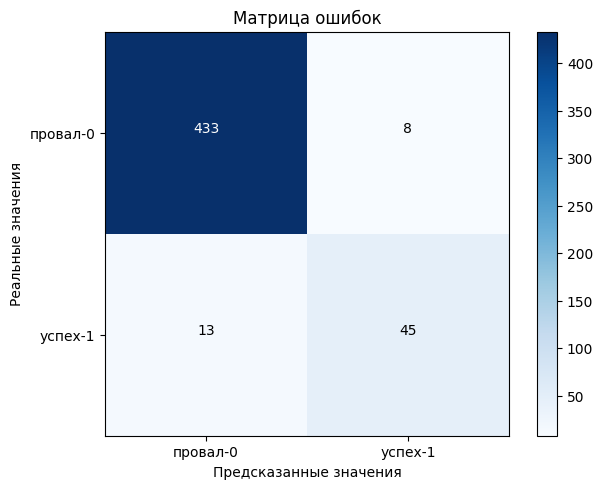

In [23]:
#сделаем картинку красивой
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Создаем матрицу ошибок
confusion_matrix = np.array([[433,  8],
                            [13, 45 ]])

# Создаем список меток классов
labels = ["провал-0", "успех-1"]

# Отображение матрицы ошибок
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()

# Добавляем метки осей
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Добавляем числа в ячейки
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Делаем красивые настройки
plt.tight_layout()
plt.ylabel("Реальные значения")
plt.xlabel("Предсказанные значения")
plt.show()